<a href="https://colab.research.google.com/github/yeekha89/Assignment-Submmissions/blob/main/Homework_3_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [3]:
# Load data
iris = datasets.load_iris()
#df = pd.DataFrame(iris.data)

# Store input in x, output in y
X = iris['data']
y = iris['target']

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Set range and mean as x and y variables
k_range = [x for x in range(1, 31)]
mean_score = []

# Hyperparameter tuning
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    mean_score.append(np.mean(scores))
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; '+
          f'standard deviation={scores.std():.2%}')

k=1 ; mean accuracy=96.00%; standard deviation=5.33%
k=2 ; mean accuracy=95.33%; standard deviation=5.21%
k=3 ; mean accuracy=96.67%; standard deviation=4.47%
k=4 ; mean accuracy=96.67%; standard deviation=4.47%
k=5 ; mean accuracy=96.67%; standard deviation=4.47%
k=6 ; mean accuracy=96.67%; standard deviation=4.47%
k=7 ; mean accuracy=96.67%; standard deviation=4.47%
k=8 ; mean accuracy=96.67%; standard deviation=4.47%
k=9 ; mean accuracy=97.33%; standard deviation=3.27%
k=10; mean accuracy=96.67%; standard deviation=4.47%
k=11; mean accuracy=96.67%; standard deviation=4.47%
k=12; mean accuracy=97.33%; standard deviation=3.27%
k=13; mean accuracy=98.00%; standard deviation=3.06%
k=14; mean accuracy=97.33%; standard deviation=4.42%
k=15; mean accuracy=97.33%; standard deviation=3.27%
k=16; mean accuracy=97.33%; standard deviation=3.27%
k=17; mean accuracy=97.33%; standard deviation=3.27%
k=18; mean accuracy=98.00%; standard deviation=3.06%
k=19; mean accuracy=97.33%; standard deviation

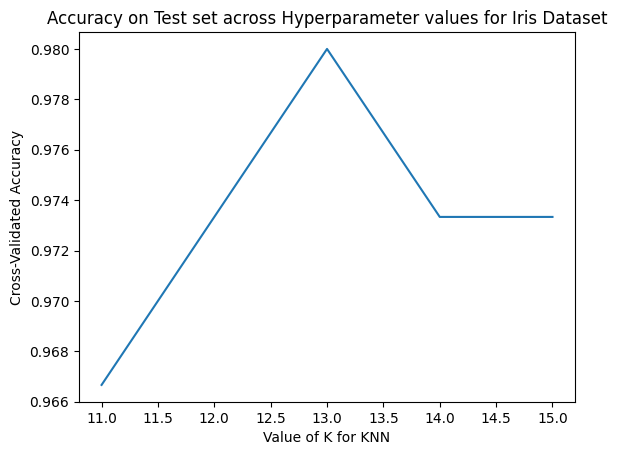

Top score of optimal classifier: 98%
Best Value of K to use is 13


In [19]:
# Model visualization
plt.plot(k_range, mean_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy on Test set across Hyperparameter values for Iris Dataset')
plt.show()

# Print the optimal k result
optimal_k = k_range[np.argmax(mean_score)]

print(f'Top score of optimal classifier: {max(np.multiply(mean_score,100)):.0f}%')
print(f'Best Value of K to use is {optimal_k}')

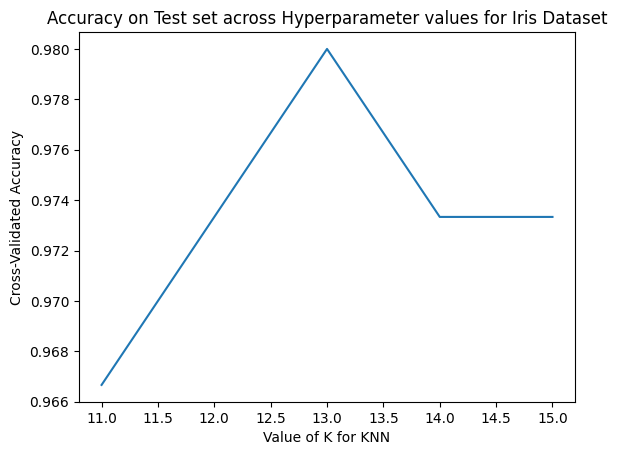

In [12]:
# Model visualization
k_range = [item for item in range(11, 16)]
mean_score = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    mean_score.append(np.mean(scores))

plt.plot(k_range,mean_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy on Test set across Hyperparameter values for Iris Dataset')
plt.show()

In [13]:
# Defining the KNN model
knn = KNeighborsClassifier()

# Defining the parameter grid for k - number of neighbors
param_grid = {'n_neighbors': range(1, 21)}  # Testing k values from 1 to 20

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Getting the best parameters and its corresponding score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

# Confirm if k=13 is optimal
print(f"Best k: {best_k}")
print(f"Best cross-validated accuracy: {best_score:.4f}")

# Evaluate the model with k=13 on the test set
knn_best = KNeighborsClassifier(n_neighbors=13)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test accuracy with k=13: {test_accuracy:.4f}")

Best k: 1
Best cross-validated accuracy: 0.9524
Test accuracy with k=13: 1.0000
